### Long-only trading strategy

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('bitcoin.csv',parse_dates=['Date'],index_col='Date')
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    36168 non-null  float64
 1   High    36168 non-null  float64
 2   Low     36168 non-null  float64
 3   Close   36168 non-null  float64
 4   Volume  36168 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


<AxesSubplot:xlabel='Date'>

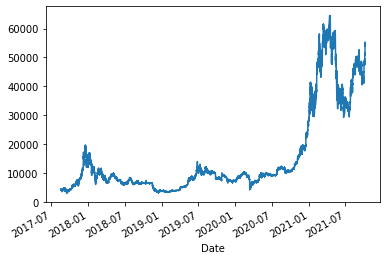

In [5]:
data.Close.plot() 

In [6]:
data['returns'] = np.log(data.Close.div(data.Close.shift(1)))

<AxesSubplot:xlabel='Date'>

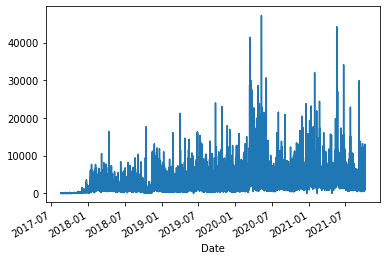

In [7]:
data.Volume.plot() 

<AxesSubplot:ylabel='Frequency'>

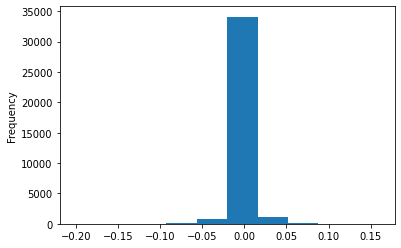

In [8]:
data.returns.plot(kind='hist')

## Buy and Hold Strategy

In [9]:
data.Close/data.Close[0]

Date
2017-08-17 04:00:00     1.000000
2017-08-17 05:00:00     1.001506
2017-08-17 06:00:00     1.003602
2017-08-17 07:00:00     1.009552
2017-08-17 08:00:00     1.012036
                         ...    
2021-10-07 05:00:00    12.703161
2021-10-07 06:00:00    12.656373
2021-10-07 07:00:00    12.707839
2021-10-07 08:00:00    12.657334
2021-10-07 09:00:00    12.531360
Name: Close, Length: 36168, dtype: float64

In [10]:
multiple = np.exp(data.returns.sum())

In [11]:
data['creturns'] = data.returns.cumsum().apply(np.exp)

In [12]:
data

,Open,High,Low,Close,Volume,returns,creturns
Date,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839


<AxesSubplot:xlabel='Date'>

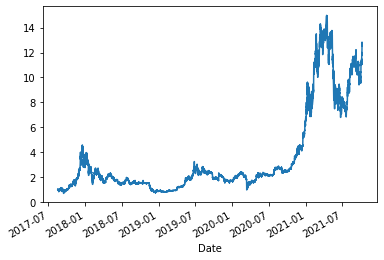

In [13]:
data.creturns.plot()

### Performance Metrics

In [14]:
mu = data.returns.mean() 
mu

6.990445168834005e-05

In [15]:
sigma=data.returns.std()
sigma 

0.009669001511177772

In [16]:
number_of_periods = 24*365.25

In [17]:
ann_mean = mu *number_of_periods
ann_mean

0.6127824234999889

In [18]:
ann_std = sigma *np.sqrt(number_of_periods)
ann_std

0.9052788232893794

In [19]:
cagr = np.exp(ann_mean)-1
cagr

0.845559389167847

In [20]:
#sharpe ratio
ann_mean/ann_std

0.6768991030557977

In [21]:
cagr/ann_std

0.9340319992192697

### Long only trading strategy

In [22]:
data 


,Open,High,Low,Close,Volume,returns,creturns
Date,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839


In [28]:
#SMA Cross over strategy 
data['vol_change'] = np.log(data.Volume.div(data.Volume.shift(1)))
data

C:\Users\jdlugosz\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Volume,returns,creturns,vol_change
Date,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839,0.848040


In [30]:
data[[data['vol_change'] > 3]] = np.nan
data[[data['vol_change'] < -3]] = np.nan

<AxesSubplot:ylabel='Frequency'>

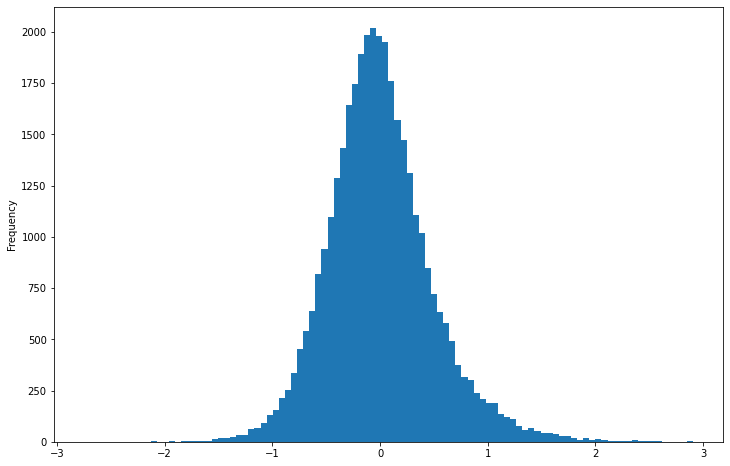

In [31]:
data.vol_change.plot(kind='hist',bins=100,figsize=(12,8))

In [32]:
data

,Open,High,Low,Close,Volume,returns,creturns,vol_change
Date,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839,0.848040


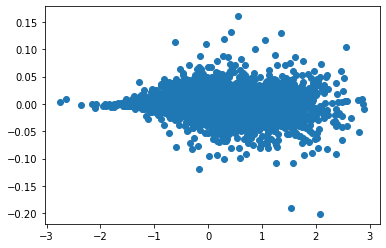

In [33]:
plt.scatter(x=data.vol_change,y=data.returns)

In [34]:
data['ret_cat'] = pd.qcut(data.returns,q=10,labels=[-5,-4,-3,-2,-1,1,2,3,4,5])

In [35]:
data['vol_cat'] = pd.qcut(data.vol_change,q=10,labels=[-5,-4,-3,-2,-1,1,2,3,4,5])

In [36]:
## Volume trading strategy 
data['position'] =1 # trading position -> long(1)

In [38]:
#get returns for very high returns >= 90th percentile 
return_thresh = np.percentile(data.returns.dropna(),90)
return_thresh

0.008232184422962084

In [39]:
cond1 = data.returns >= return_thresh
cond1

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00    False
2017-08-17 08:00:00    False
                       ...  
2021-10-07 05:00:00    False
2021-10-07 06:00:00    False
2021-10-07 07:00:00    False
2021-10-07 08:00:00    False
2021-10-07 09:00:00    False
Name: returns, Length: 36168, dtype: bool

In [43]:
#moderate threshold 
volume_thresh = np.percentile(data.vol_change.dropna(),[5,20])
volume_thresh

array([-0.72895253, -0.37604441])

In [44]:
cond2 = data.vol_change.between(volume_thresh[0],volume_thresh[1])
cond2

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00     True
2017-08-17 06:00:00    False
2017-08-17 07:00:00     True
2017-08-17 08:00:00    False
                       ...  
2021-10-07 05:00:00    False
2021-10-07 06:00:00    False
2021-10-07 07:00:00    False
2021-10-07 08:00:00     True
2021-10-07 09:00:00    False
Name: vol_change, Length: 36168, dtype: bool

In [45]:
data.loc[cond1 & cond2,'position'] = 0

In [46]:
data

,Open,High,Low,Close,Volume,returns,creturns,vol_change,ret_cat,vol_cat,position
Date,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


In [47]:
#Back test strategy 
data['strategy'] = data.position.shift(1) * data['returns']
data

,Open,High,Low,Close,Volume,returns,creturns,vol_change,ret_cat,vol_cat,position,strategy
Date,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058


In [48]:
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

<AxesSubplot:xlabel='Date'>

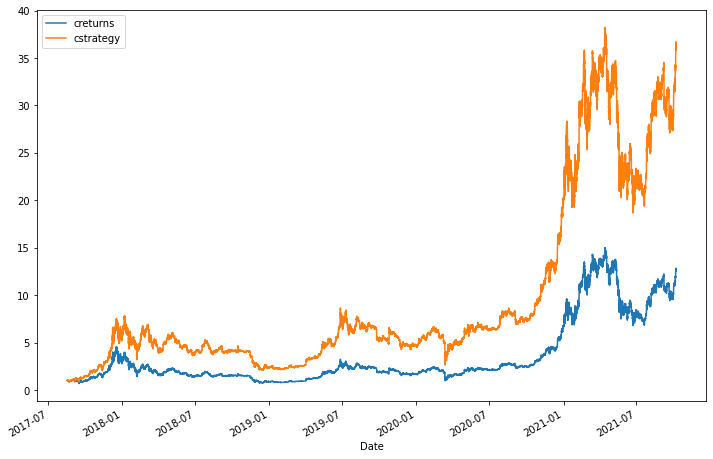

In [50]:
data[['creturns','cstrategy']].plot(figsize =(12,8))

In [51]:
tp_year = 24*365.25

In [54]:
ann_mean = data[['returns','strategy']].mean()*tp_year
ann_mean

returns     0.615974
strategy    0.867801
dtype: float64

In [55]:
ann_std = data[['returns','strategy']].std()*np.sqrt(tp_year)
ann_std

returns     0.905397
strategy    0.891596
dtype: float64

In [56]:
sharpe = (np.exp(ann_mean)-1)/ann_std
sharpe

returns     0.940426
strategy    1.549656
dtype: float64

In [57]:
data['trades'] = data.position.diff().fillna(0).abs()

In [58]:
commissions = 0.00075

In [59]:
other = 0.0001

In [60]:
ptc = np.log(1-commissions)+np.log(1-other)

In [61]:
data['strategy_net'] = data.strategy +data.trades *ptc 

In [62]:
data['cstrategy_net'] = data.strategy_net.cumsum().apply(np.exp)

In [63]:
data

,Open,High,Low,Close,Volume,returns,creturns,vol_change,ret_cat,vol_cat,position,strategy,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0,0.001505,1.001506
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602,0.0,0.002090,1.003602
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0,0.005912,1.009552
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,36.318564,0.0,-0.006146,19.774125
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,36.184797,0.0,-0.003690,19.701293
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,36.331940,0.0,0.004058,19.781408


<AxesSubplot:xlabel='Date'>

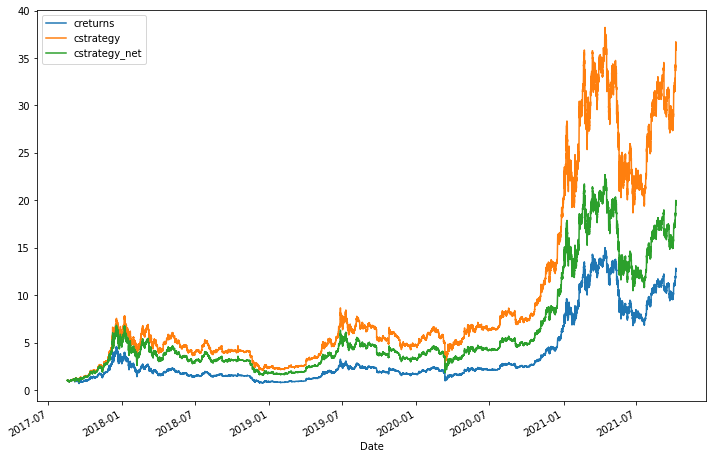

In [64]:
data[['creturns','cstrategy','cstrategy_net']].plot(figsize=(12,8))